# HW 2: Jonathan Levine

## Question 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from ptsa.data import readers
import pandas as pd  # optional
import sys
sys.path.append('/data/global/ptsa_plot/')
from ptsa_plot.topo import topoplot
from scipy.stats import kurtosis

In [4]:
ltpFR2_events = np.load('/data/exp_events/ltpFR2_events.npy')

In [5]:
# Load in scalp electrode locations:
with open('/data/scalp_electrode_locations/HCGSN128.dat', 'r') as sensorfile:
    angles, radii = sensorfile.readlines()
    sensors = (np.r_[np.array([np.float(a)
                               for a in angles.strip().split()]), 0],
               np.r_[[np.float(r) for r in radii.strip().split()], 0])
sensor_names = np.array(['{:03}'.format(x) for x in range(1, len(sensors[0])+1)])

In [6]:
sensor_angles = np.array([sensors[0][71], sensors[0][61]])
sensor_radii = np.array([sensors[1][71], sensors[1][61]])
ex_sensors = (sensor_angles,sensor_radii)


<IPython.core.display.Javascript object>


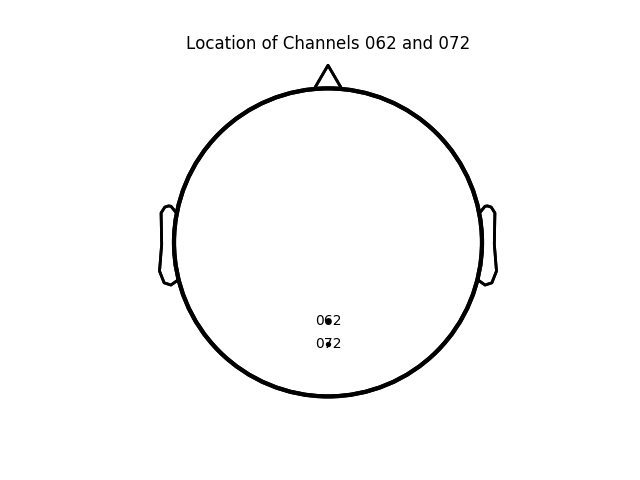

In [36]:
plt.figure()
topoplot()
topoplot(labels=["072","062"], sensors=ex_sensors)
plt.title('Location of Channels 062 and 072')
plt.savefig('Q1: Topoplot')

In [7]:
subject_events = ltpFR2_events[(ltpFR2_events['subject']=='LTP093') 
                               & (ltpFR2_events['type']=='WORD')
                              & (ltpFR2_events['session']==1)
                              & (ltpFR2_events['trial']==1)]

In [8]:
events_recalled = subject_events[(subject_events['recalled'] == 1)].view(np.recarray)
events_forgot = subject_events[(subject_events['recalled'] == 0)].view(np.recarray)

events_recalled[1]

('LTP093', 1, 1.0, 'WORD', 2.0, 0.0, nan, 24000.0, 10.0, 'MAILBOX', 857.0, 1.0, 0.0, nan, nan, 1409671139687.0, 1, '/data/eeg/scalp/ltp/ltpFR2/LTP093/session_0/eeg/eeg.reref/LTP093_2Sep14_1020', 287178, -1, -1, -1.0, -1.0, 1)

In [9]:
eegRecalled = readers.EEGReader(events=events_recalled[0:5], channels=np.array(["072","062"]),
                        start_time=-0.5, end_time=2.1).read()

eegForgot = readers.EEGReader(events=events_forgot[0:5], channels=np.array(["072","062"]),
                        start_time=-0.5, end_time=2.1).read()

<IPython.core.display.Javascript object>


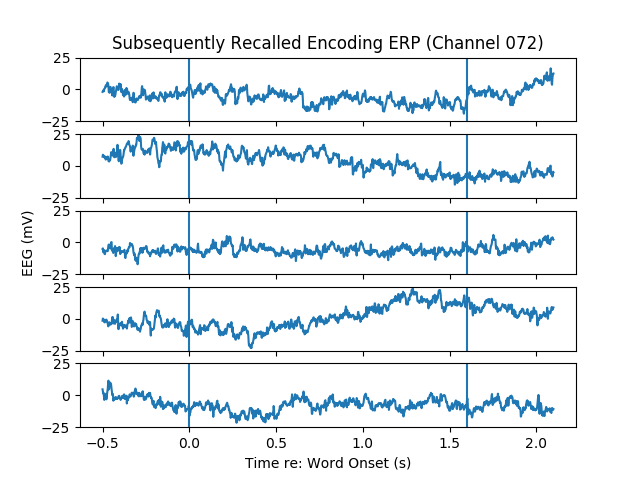

/data/global/Anaconda-4.4.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Means: [-5.0999968287692177, 3.5548793748461613, -5.5622350278461496, 1.507380130153845, -7.420402069615359]
SDVs: [5.6216378310888864, 8.943774420778011, 3.4006731852390817, 9.0755775921991422, 5.0159369425488984]
Kurtosis: [0.23125071337842185, -1.1541099246928226, 0.26307411734599606, -0.7096657841035867, 0.23796278623899747]


In [127]:
# Recalled 072
f, axarr = plt.subplots(5, sharex=True)
eeg = eegRecalled
means = []
stds = []
ks = []

for i in range(0,5):
    axarr[0].set_title('Subsequently Recalled Encoding EEG (Channel 072)')
    axarr[4].set_xlabel('Time re: Word Onset (s)')
    myEvent = eegRecalled.events.values[i]
    s = myEvent['item']
    axarr[i].plot(eeg.time, np.squeeze(eeg.sel(events=eeg.events.values['item']==s, channels='072')))
    
    axarr[i].axvline(x=0.0)
    axarr[i].axvline(x=1.6)
    axarr[i].set_ylim([-25, 25])
    axarr[2].set_ylabel('EEG (mV)')
    axarr[i].legend()
    means.append(np.mean(eeg.sel(events=eeg.events.values['item']==s, channels='072')).values.sum())
    stds.append(np.std(eeg.sel(events=eeg.events.values['item']==s, channels='072')).values.sum())
    
    ks.append(kurtosis((eeg.sel(events=eeg.events.values['item']==s, channels='072').values)[0]))
plt.savefig('Recalled_072')

print("Means: " + str(means))
print("SDVs: " + str(stds))
print("Kurtosis: " + str(ks))

<IPython.core.display.Javascript object>


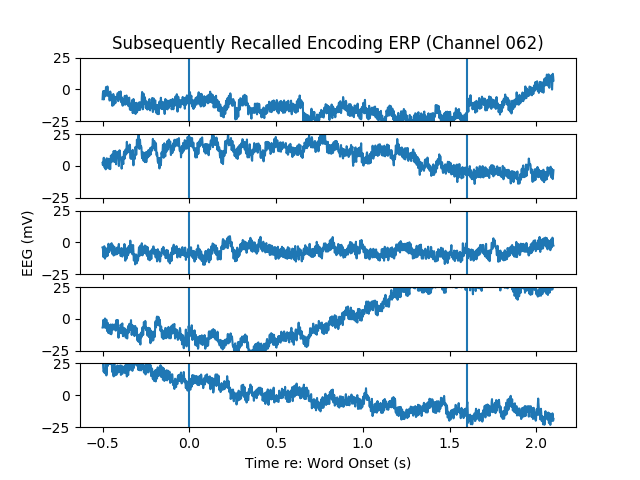

/data/global/Anaconda-4.4.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Means: [-13.645241118230736, 7.3370630342307654, -6.9006481982307628, 3.415315835307688, -0.79970260292307715]
SDVs: [7.4170563093944608, 9.1041871052982231, 4.0989241194877124, 19.085829283751117, 12.466856466085265]
Kurtosis: [0.4736211635086729, -0.9298042528178154, -0.34676690518145525, -1.4822550494591833, -0.6401166182635603]


In [130]:
# Recalled 062
f, axarr = plt.subplots(5, sharex=True)
eeg = eegRecalled
means = []
stds = []
ks = []

for i in range(0,5):
    axarr[0].set_title('Subsequently Recalled Encoding EEG (Channel 062)')
    axarr[4].set_xlabel('Time re: Word Onset (s)')
    myEvent = eegRecalled.events.values[i]
    s = myEvent['item']
    axarr[i].plot(eeg.time, np.squeeze(eeg.sel(events=eeg.events.values['item']==s, channels='062')))
    axarr[i].axvline(x=0.0)
    axarr[i].axvline(x=1.6)
    axarr[i].set_ylim([-25, 25])
    axarr[2].set_ylabel('EEG (mV)')
    axarr[i].legend()
    
    means.append(np.mean(eeg.sel(events=eeg.events.values['item']==s, channels='062')).values.sum())
    stds.append(np.std(eeg.sel(events=eeg.events.values['item']==s, channels='062')).values.sum())
    
    ks.append(kurtosis((eeg.sel(events=eeg.events.values['item']==s, channels='062').values)[0]))
    
    
plt.savefig('Recalled_062')

print("Means: " + str(means))
print("SDVs: " + str(stds))
print("Kurtosis: " + str(ks))

<IPython.core.display.Javascript object>


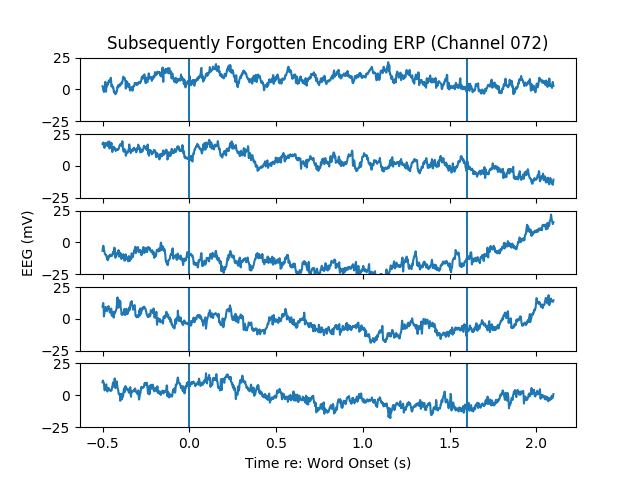

/data/global/Anaconda-4.4.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Means: [7.48050007823075, 4.051157461615376, -12.708029106923039, -2.768968795384616, -0.92870203938461549]
SDVs: [4.7040710268403121, 7.5806775400143156, 8.8227700437618672, 6.972945286204383, 7.088297855863317]
Kurtosis: [-0.4983383940119821, -0.6639599582578604, 1.619758884821092, -0.12814786078039075, -0.7039682454605467]


In [131]:
# NOT Recalled 072
f, axarr = plt.subplots(5, sharex=True)
eeg = eegForgot

means = []
stds = []
ks = []

for i in range(0,5):
    axarr[0].set_title('Subsequently Forgotten Encoding EEG (Channel 072)')
    axarr[4].set_xlabel('Time re: Word Onset (s)')
    myEvent = eeg.events.values[i]
    s = myEvent['item']
    axarr[i].plot(eeg.time, np.squeeze(eeg.sel(events=eeg.events.values['item']==s, channels='072')))
    
    axarr[i].axvline(x=0.0)
    axarr[i].axvline(x=1.6)
    axarr[i].set_ylim([-25, 25])
    axarr[2].set_ylabel('EEG (mV)')
    axarr[i].legend()
    
    means.append(np.mean(eeg.sel(events=eeg.events.values['item']==s, channels='072')).values.sum())
    stds.append(np.std(eeg.sel(events=eeg.events.values['item']==s, channels='072')).values.sum())
    
    ks.append(kurtosis((eeg.sel(events=eeg.events.values['item']==s, channels='072').values)[0]))
    
plt.savefig('NOT_Recalled_072')

print("Means: " + str(means))
print("SDVs: " + str(stds))
print("Kurtosis: " + str(ks))

<IPython.core.display.Javascript object>


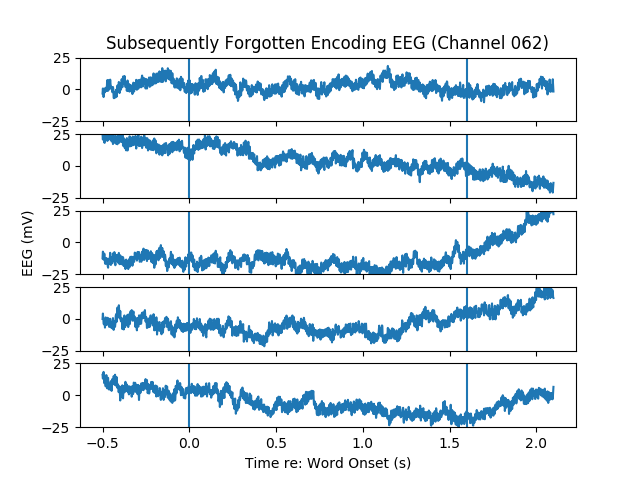

Means: [2.6108006965384623, 4.6054207363846018, -11.245605104307662, -2.9026046993076879, -5.5737968517692273]
SDVs: [4.7906489715593574, 10.339577748561911, 11.034359801192743, 8.9068543493616037, 8.6673555464082224]
Kurtosis: [-0.18656240738852148, -0.6812270496239252, 2.3555742736319703, 0.3629172583520788, -0.8688645759271654]


In [10]:
# NOT Recalled 062
f, axarr = plt.subplots(5, sharex=True)
eeg = eegForgot

means = []
stds = []
ks = []

for i in range(0,5):
    axarr[0].set_title('Subsequently Forgotten Encoding EEG (Channel 062)')
    axarr[4].set_xlabel('Time re: Word Onset (s)')
    myEvent = eeg.events.values[i]
    s = myEvent['item']
    axarr[i].plot(eeg.time, np.squeeze(eeg.sel(events=eeg.events.values['item']==s, channels='062')))    
    axarr[i].axvline(x=0.0)
    axarr[i].axvline(x=1.6)
    axarr[i].set_ylim([-25, 25])
    axarr[2].set_ylabel('EEG (mV)')
    
    means.append(np.mean(eeg.sel(events=eeg.events.values['item']==s, channels='062')).values.sum())
    stds.append(np.std(eeg.sel(events=eeg.events.values['item']==s, channels='062')).values.sum())
    
    ks.append(kurtosis((eeg.sel(events=eeg.events.values['item']==s, channels='062').values)[0]))
    
    
    
plt.savefig('NOT_Recalled_062')
print("Means: " + str(means))
print("SDVs: " + str(stds))
print("Kurtosis: " + str(ks))


# Question 2

<IPython.core.display.Javascript object>


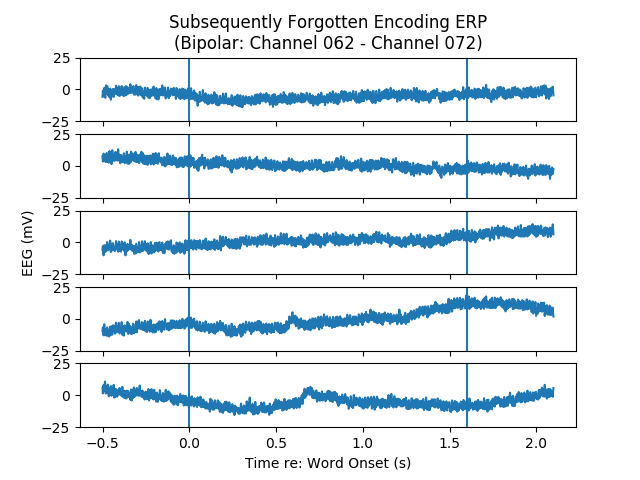

/data/global/Anaconda-4.4.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Means: [-4.8696993816923069, 0.55426327476923076, 1.4624240026153847, -0.13363590392307706, -4.645094812384615]
SDVs: [3.476777533757097, 3.9854817071042641, 4.6709134216473931, 7.7575854520322727, 4.78840072743803]
Kurtosis: [-0.5554286201304448, -0.32210515682725616, -0.38788610809109025, -0.9469904686743948, -0.48204020342545073]


In [152]:
# NOT Recalled Dipolar
f, axarr = plt.subplots(5, sharex=True)
eeg = eegForgot

means = []
stds = []
ks = []

for i in range(0,5):
    axarr[0].set_title('Subsequently Forgotten Encoding EEG'  + '\n' + '(Bipolar: Channel 062 - Channel 072)')
    axarr[4].set_xlabel('Time re: Word Onset (s)')
    myEvent = eeg.events.values[i]
    s = myEvent['item']
    chan1 = np.squeeze(eeg.sel(events=eeg.events.values['item']==s, channels='062'))
    chan2 = np.squeeze(eeg.sel(events=eeg.events.values['item']==s, channels='072'))
    axarr[i].plot(eeg.time, chan1.values-chan2.values)    
    axarr[i].axvline(x=0.0)
    axarr[i].axvline(x=1.6)
    axarr[i].set_ylim([-25, 25])
    axarr[2].set_ylabel('EEG (mV)')
    axarr[i].legend()
    
    means.append(np.mean(chan1.values - chan2.values))
    stds.append(np.std(chan1.values - chan2.values))
    
    ks.append(kurtosis(chan1.values - chan2.values))
    
    
    
plt.savefig('NOT_Recalled_Bipolar')
print("Means: " + str(means))
print("SDVs: " + str(stds))
print("Kurtosis: " + str(ks))

<IPython.core.display.Javascript object>


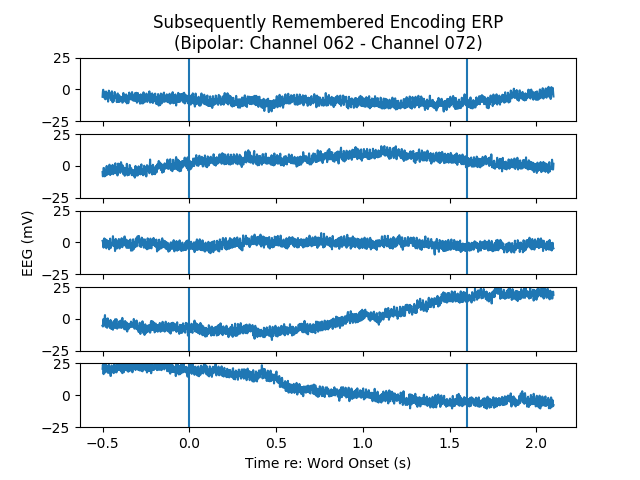

/data/global/Anaconda-4.4.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Means: [-8.5452442894615377, 3.7821836593846148, -1.3384131703846154, 1.9079357051538457, 6.6206994666923071]
SDVs: [3.4254084487790686, 4.7667789723318528, 2.9591350329160164, 11.466571631416503, 11.261196670831323]
Kurtosis: [-0.35980229586399215, -0.43229834196501216, -0.5935171164962636, -1.2125338908446681, -1.4348760840665078]


In [151]:
#Recalled Dipolar
f, axarr = plt.subplots(5, sharex=True)
eeg = eegRecalled

means = []
stds = []
ks = []

for i in range(0,5):
    axarr[0].set_title('Subsequently Remembered Encoding EEG' + '\n' + '(Bipolar: Channel 062 - Channel 072)')
    axarr[4].set_xlabel('Time re: Word Onset (s)')
    myEvent = eeg.events.values[i]
    s = myEvent['item']
    chan1 = np.squeeze(eeg.sel(events=eeg.events.values['item']==s, channels='062'))
    chan2 = np.squeeze(eeg.sel(events=eeg.events.values['item']==s, channels='072'))
    axarr[i].plot(eeg.time, chan1.values-chan2.values)    
    axarr[i].axvline(x=0.0)
    axarr[i].axvline(x=1.6)
    axarr[i].set_ylim([-25, 25])
    axarr[2].set_ylabel('EEG (mV)')
    axarr[i].legend()
    
    means.append(np.mean(chan1.values - chan2.values))
    stds.append(np.std(chan1.values - chan2.values))
    
    ks.append(kurtosis(chan1.values - chan2.values))
    
    
    
plt.savefig('Recalled_Bipolar')
print("Means: " + str(means))
print("SDVs: " + str(stds))
print("Kurtosis: " + str(ks))

# Question 3


In [21]:
ramFR1_events = np.load('/data/exp_events/ramFR1_events.npy')


subjectID = 'R1111M'
tal_path = '/data/tal/'+subjectID+'_talLocs_database_bipol.mat'
tal_reader = readers.TalReader(filename=tal_path, struct_type = 'bi')
monopolar_channels = tal_reader.get_monopolar_channels()
bipolar_pairs = tal_reader.get_bipolar_pairs()

In [19]:
tal_reader.tal_struct_array['channel']

array([[  1,   2],
       [  1,   9],
       [  2,   3],
       [  2,  10],
       [  3,   4],
       [  3,  11],
       [  4,   5],
       [  4,  12],
       [  5,   6],
       [  5,  13],
       [  6,   7],
       [  6,  14],
       [  7,   8],
       [  7,  15],
       [  8,  16],
       [  9,  10],
       [  9,  17],
       [ 10,  11],
       [ 10,  18],
       [ 11,  12],
       [ 11,  19],
       [ 12,  13],
       [ 12,  20],
       [ 13,  14],
       [ 13,  21],
       [ 14,  15],
       [ 14,  22],
       [ 15,  16],
       [ 15,  23],
       [ 16,  24],
       [ 17,  18],
       [ 17,  25],
       [ 18,  19],
       [ 18,  26],
       [ 19,  20],
       [ 19,  27],
       [ 20,  21],
       [ 20,  28],
       [ 21,  22],
       [ 21,  29],
       [ 22,  23],
       [ 22,  30],
       [ 23,  24],
       [ 23,  31],
       [ 24,  32],
       [ 25,  26],
       [ 25,  33],
       [ 26,  27],
       [ 26,  34],
       [ 27,  28],
       [ 27,  35],
       [ 28,  29],
       [ 28,

In [24]:
(tal_reader.tal_struct_array['Loc1'][0] +
tal_reader.tal_struct_array['Loc2'][0] +
tal_reader.tal_struct_array['Loc3'][0] +
tal_reader.tal_struct_array['Loc4'][0] +
tal_reader.tal_struct_array['Loc5'][0])

'Left CerebrumTemporal LobeMiddle Temporal GyrusGray MatterBrodmann area 21'

In [28]:
tal_reader.read()

rec.array([ ('R1111M', [  1,   2], 'LPOG1-LPOG2', 'LPOG', -67.6431 , -19.84015  , -17.08995  , 'Left Cerebrum', 'Temporal Lobe', 'Middle Temporal Gyrus', 'Gray Matter', 'Brodmann area 21', b'[]', 'lsag', '1-2', 'G',   8.22266264, (-66.14 , -18.33 , -21.425,   9.66269631, 'middletemporal', -64.5034485, -17.996502 , -19.586545 , 'middletemporal',  2.48383544,   7.45008706, -63.8215, -18.1725, -19.9735, 'middletemporal',  2.73990889,   8.12079965, -63.9295, -18.339 , -20.051 , 'middletemporal',  2.60274226,   7.92064499, '/data/eeg/freesurfer/subjects/average/surf/lh.pial', '/data/eeg/freesurfer/subjects/average/surf/rh.pial'), (-58.625,  -2.74 , -37.385,   8.67918199, 'middletemporal', -57.8816775,  -1.36671600e+00, -36.8690175, 'middletemporal',  1.64458968,  10.65546964, -61.2515,  -2.7945, -38.2055, 'middletemporal',  2.75221597,  10.08683751, -63.9295, -18.339 , -20.051 , 'middletemporal',  23.91514326,   7.92064499, '/data/eeg/freesurfer/subjects/R1111M/surf/lh.pial', '/data/eeg/fre

In [33]:
subject_events = ramFR1_events[(ramFR1_events['subject']==subjectID) 
                              & (ramFR1_events['type']=='WORD') 
                              & (ramFR1_events['session']==0)
                              & (ramFR1_events['list']==24)]


events_recalled = subject_events[(subject_events['recalled'] == 1)].view(np.recarray)
events_forgot = subject_events[(subject_events['recalled'] == 0)].view(np.recarray)


In [62]:
eegRecalled = readers.EEGReader(
    events=events_recalled ,
    channels=monopolar_channels, start_time=-0.5, end_time=2.1).read()

eegForgot = readers.EEGReader(
    events=events_forgot ,
    channels=monopolar_channels, start_time=-0.5, end_time=2.1).read()

<IPython.core.display.Javascript object>


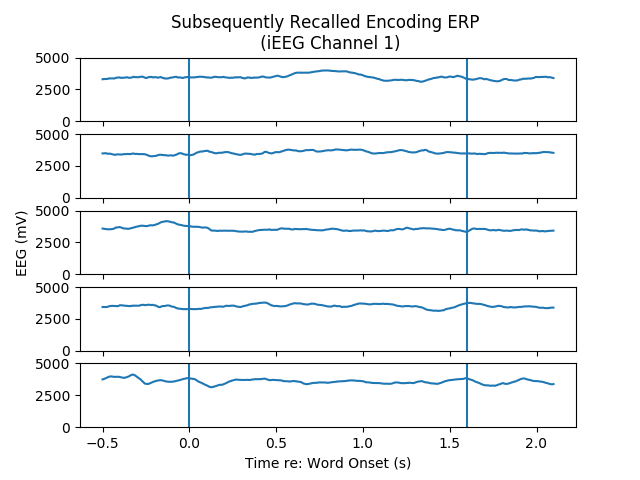

Means: [3464.0741974873026, 3541.6862052994638, 3544.8758520030819, 3504.6727148976101, 3592.7115480369503]
SDVs: [202.78422352072189, 125.72735087639785, 168.27081325149746, 140.99452677069399, 181.28706842188228]
Kurtosis: [0.6048962831926152, -0.6934228674416296, 2.8422140658359796, -0.10618371145427785, 0.006952406318954996]


In [60]:
# Recalled iEEG R1111M Monopolar
f, axarr = plt.subplots(5, sharex=True)
eeg = eegRecalled
means = []
stds = []
ks = []
ch = monopolar_channels[0]

for i in range(0,5):
    axarr[0].set_title('Subsequently Recalled Encoding EEG \n (iEEG Channel 1)')
    axarr[4].set_xlabel('Time re: Word Onset (s)')
    myEvent = eegRecalled.events.values[i]
    s = myEvent['item']
    axarr[i].plot(eeg.time, np.squeeze(eeg.sel(events=eeg.events.values['item']==s, channels=eeg.channels.values[0])))
    
    axarr[i].axvline(x=0.0)
    axarr[i].axvline(x=1.6)
    axarr[i].set_ylim([0, 5000])
    axarr[2].set_ylabel('EEG (mV)')
    means.append(np.mean(eeg.sel(events=eeg.events.values['item']==s, channels=ch)).values.sum())
    stds.append(np.std(eeg.sel(events=eeg.events.values['item']==s, channels=ch)).values.sum())
    
    ks.append(kurtosis((eeg.sel(events=eeg.events.values['item']==s, channels=ch).values)[0]))
plt.savefig('Recalled_iEEG_Monopolar')

print("Means: " + str(means))
print("SDVs: " + str(stds))
print("Kurtosis: " + str(ks))

In [68]:
#Dipolar Pairs
eegRecalled = readers.EEGReader(
    events=events_recalled ,
    channels=bipolar_pairs, start_time=-0.5, end_time=2.1).read()

eegForgot = readers.EEGReader(
    events=events_forgot ,
    channels=bipolar_pairs, start_time=-0.5, end_time=2.1).read()

AttributeError: 'record' object has no attribute 'decode'

<IPython.core.display.Javascript object>


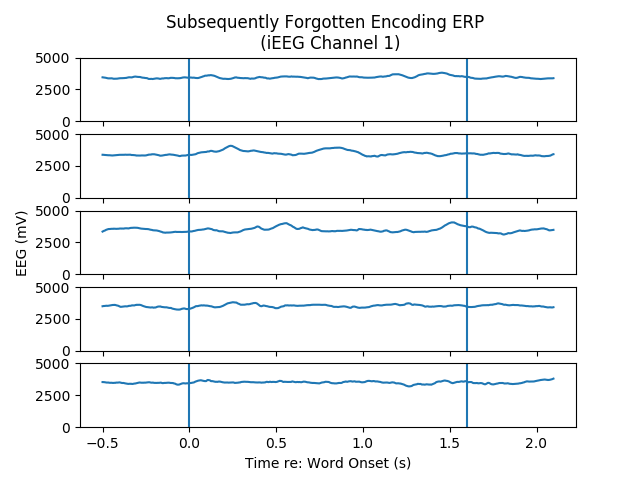

Means: [3461.080194454194, 3489.1214988698925, 3491.2391983494967, 3518.8527880461925, 3508.2438258291031]
SDVs: [109.48410073093665, 182.14909349578335, 182.62881227521072, 104.72905861850791, 92.431568230183643]
Kurtosis: [1.1564783288625726, 0.7482911192007728, 0.9494455597019891, 0.2991676317774741, 0.8113192799517219]


In [64]:
# Forgotten iEEG R1111M Monopolar
f, axarr = plt.subplots(5, sharex=True)
eeg = eegForgot
means = []
stds = []
ks = []
ch = monopolar_channels[0]

for i in range(0,5):
    axarr[0].set_title('Subsequently Forgotten Encoding EEG \n (iEEG Channel 1)')
    axarr[4].set_xlabel('Time re: Word Onset (s)')
    myEvent = eegForgot.events.values[i]
    s = myEvent['item']
    axarr[i].plot(eeg.time, np.squeeze(eeg.sel(events=eeg.events.values['item']==s, channels=eeg.channels.values[0])))
    
    axarr[i].axvline(x=0.0)
    axarr[i].axvline(x=1.6)
    axarr[i].set_ylim([0, 5000])
    axarr[2].set_ylabel('EEG (mV)')
    means.append(np.mean(eeg.sel(events=eeg.events.values['item']==s, channels=ch)).values.sum())
    stds.append(np.std(eeg.sel(events=eeg.events.values['item']==s, channels=ch)).values.sum())
    
    ks.append(kurtosis((eeg.sel(events=eeg.events.values['item']==s, channels=ch).values)[0]))
plt.savefig('Forgot_iEEG_Monopolar')

print("Means: " + str(means))
print("SDVs: " + str(stds))
print("Kurtosis: " + str(ks))

<IPython.core.display.Javascript object>


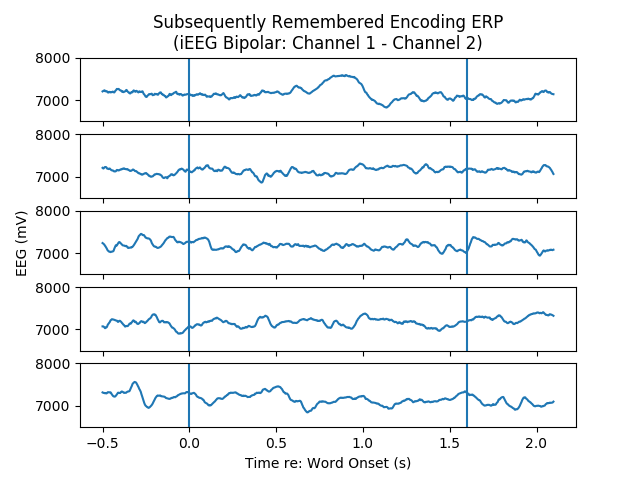

Means: [7143.7849658537334, 7134.6400567944575, 7182.2706953410325, 7175.3846930130867, 7166.4808595227096]
SDVs: [150.2465759026646, 75.721732551193554, 92.922405857330233, 101.1328098356291, 131.98811851604992]
Kurtosis: [1.6774150162308885, 0.333412619722933, -0.11895568819520452, -0.2706549971122212, -0.16406378793032994]


/data/global/Anaconda-4.4.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [81]:
#Recalled Bipolar iEEG
f, axarr = plt.subplots(5, sharex=True)
eeg = eegRecalled

means = []
stds = []
ks = []

ch1 = bipolar_pairs[0][0]
ch2 = bipolar_pairs[0][1]

for i in range(0,5):
    axarr[0].set_title('Subsequently Remembered Encoding EEG' + '\n' + '(iEEG Bipolar: Channel 1 - Channel 2)')
    axarr[4].set_xlabel('Time re: Word Onset (s)')
    myEvent = eeg.events.values[i]
    s = myEvent['item']
    chan1 = np.squeeze(eeg.sel(events=eeg.events.values['item']==s, channels=ch1))
    chan2 = np.squeeze(eeg.sel(events=eeg.events.values['item']==s, channels=ch2))
    axarr[i].plot(eeg.time, chan1.values-chan2.values)    
    axarr[i].axvline(x=0.0)
    axarr[i].axvline(x=1.6)
    axarr[i].set_ylim([6500, 8000])
    axarr[2].set_ylabel('EEG (mV)')
    axarr[i].legend()
    
    means.append(np.mean(chan1.values - chan2.values))
    stds.append(np.std(chan1.values - chan2.values))
    
    ks.append(kurtosis(chan1.values - chan2.values))
    
    
    
plt.savefig('Recalled_Bipolar_iEEG')
print("Means: " + str(means))
print("SDVs: " + str(stds))
print("Kurtosis: " + str(ks))

<IPython.core.display.Javascript object>


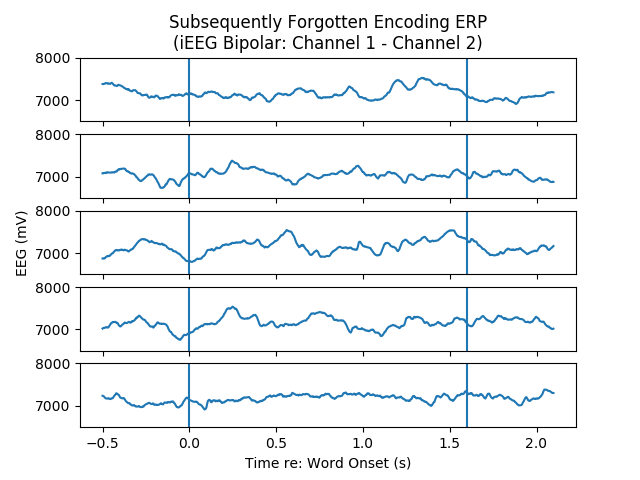

/data/global/Anaconda-4.4.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Means: [7155.5661529083909, 7040.0013194980756, 7148.9073100723645, 7158.7455672024644, 7177.2956978198617]
SDVs: [132.1946136125996, 106.71523510939926, 157.71234689142315, 137.56609113453936, 91.2860701681969]
Kurtosis: [-0.01496922355243413, 0.5075018679478758, -0.21527865163781845, 0.35442976579353536, -0.427306253953855]


In [83]:
#Forgotten Bipolar iEEG
f, axarr = plt.subplots(5, sharex=True)
eeg = eegForgot

means = []
stds = []
ks = []

ch1 = bipolar_pairs[0][0]
ch2 = bipolar_pairs[0][1]

for i in range(0,5):
    axarr[0].set_title('Subsequently Forgotten Encoding EEG' + '\n' + '(iEEG Bipolar: Channel 1 - Channel 2)')
    axarr[4].set_xlabel('Time re: Word Onset (s)')
    myEvent = eeg.events.values[i]
    s = myEvent['item']
    chan1 = np.squeeze(eeg.sel(events=eeg.events.values['item']==s, channels=ch1))
    chan2 = np.squeeze(eeg.sel(events=eeg.events.values['item']==s, channels=ch2))
    axarr[i].plot(eeg.time, chan1.values-chan2.values)    
    axarr[i].axvline(x=0.0)
    axarr[i].axvline(x=1.6)
    axarr[i].set_ylim([6500, 8000])
    axarr[2].set_ylabel('EEG (mV)')
    axarr[i].legend()
    
    means.append(np.mean(chan1.values - chan2.values))
    stds.append(np.std(chan1.values - chan2.values))
    
    ks.append(kurtosis(chan1.values - chan2.values))
    
    
    
plt.savefig('Forgot_Bipolar_iEEG')
print("Means: " + str(means))
print("SDVs: " + str(stds))
print("Kurtosis: " + str(ks))